1. Загрузите файл HR.csv в pandas dataframe

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv(r"HR.csv")

2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [15]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Так как в describe() нет моды, выведем ее отдельно

In [16]:
for col in ['satisfaction_level',	'last_evaluation', 'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident', 'left', 'promotion_last_5years']:
  print(f'Мода столбца "{col}": {df[col].mode()[0]}', end='\n\n')

Мода столбца "satisfaction_level": 0.1

Мода столбца "last_evaluation": 0.55

Мода столбца "number_project": 4

Мода столбца "average_montly_hours": 135

Мода столбца "time_spend_company": 3

Мода столбца "Work_accident": 0

Мода столбца "left": 0

Мода столбца "promotion_last_5years": 0



3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

Вытащим только количественные столбцы

In [17]:
only_nums = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

Создадим матрицу корреляции

In [18]:
corr_m = only_nums.corr()

In [19]:
corr_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

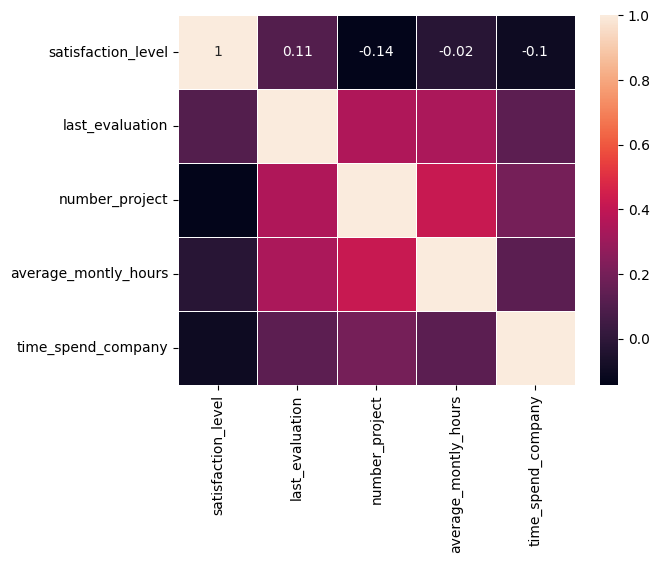

In [48]:
sns.heatmap(corr_m, annot = True, linewidths=.5)

P.S.: Не понимаю почему, но в юпитер ноутбуке значения корреляции п=отражаются только в первой строке, а в колабе все нормально прописывается по всем ячейкам =(((

Два самые скоррелированные признака - это average_montly_hours и number_project. 
То есть, чем больше человек сделал проектов, тем больше он проводил времени на рабочем месте. 
Два наименее скоррелированные признака - это satisfaction_level и average_montly_hours.
То есть уровень удовлетворенности работой никак не зависит от времени проведенного на работе

4. Рассчитайте сколько сотрудников работает в каждом департаменте

<Axes: xlabel='Отделы', ylabel='Количество сотрудников'>

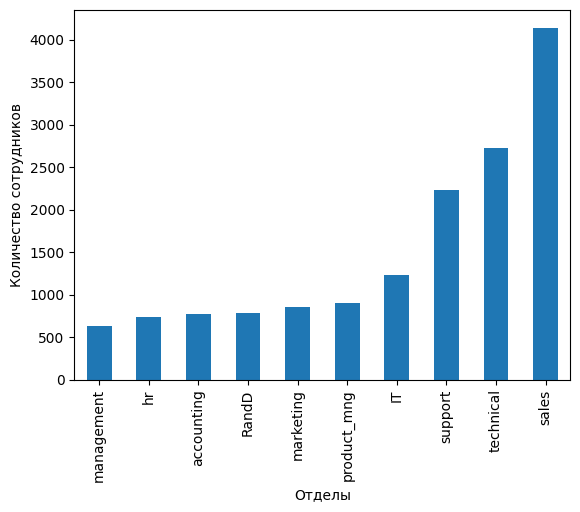

In [20]:
emp_dep = df.groupby('department')['satisfaction_level'].count().sort_values()
emp_dep.plot(kind='bar', xlabel='Отделы', ylabel='Количество сотрудников')

<Axes: title={'center': 'Распределение сотрудников по отделам'}, ylabel='satisfaction_level'>

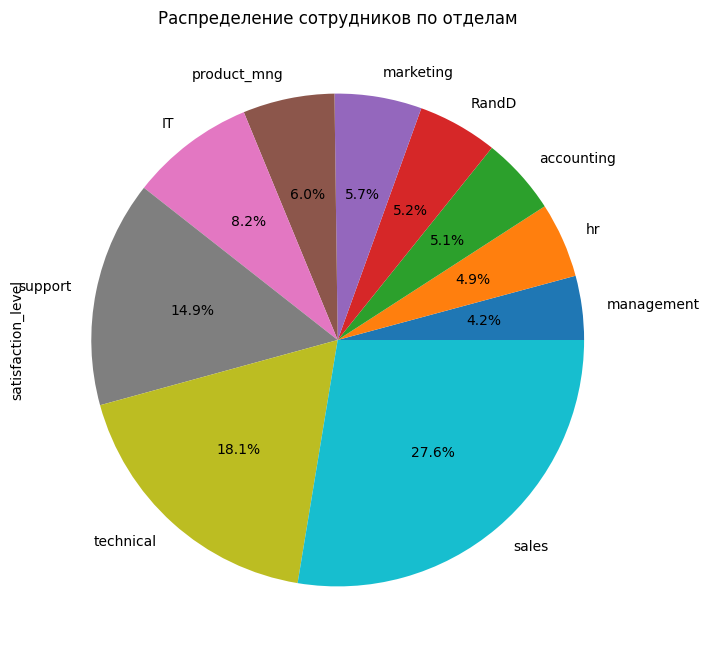

In [21]:
emp_dep.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Распределение сотрудников по отделам')

5. Показать распределение сотрудников по зарплатам

<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, xlabel='Уровень дохода', ylabel='Количество сотрудников'>

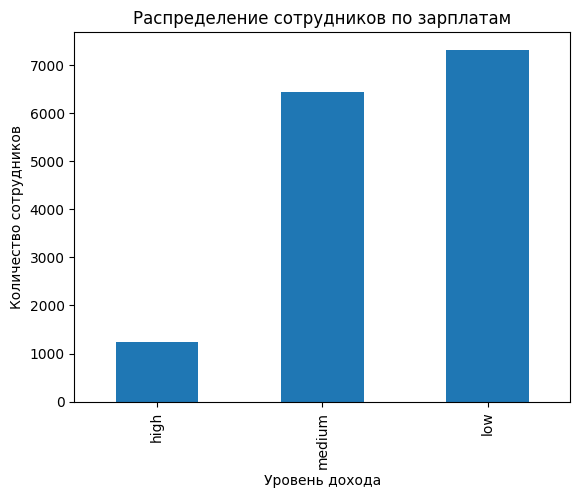

In [22]:
df['salary'].value_counts().sort_values().plot(kind='bar', xlabel='Уровень дохода', ylabel='Количество сотрудников', title='Распределение сотрудников по зарплатам')

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

<Axes: title={'center': 'Распределение сотрудников по зарплатам в каждом департаменте'}, xlabel='Отделы', ylabel='Количество сотрудников'>

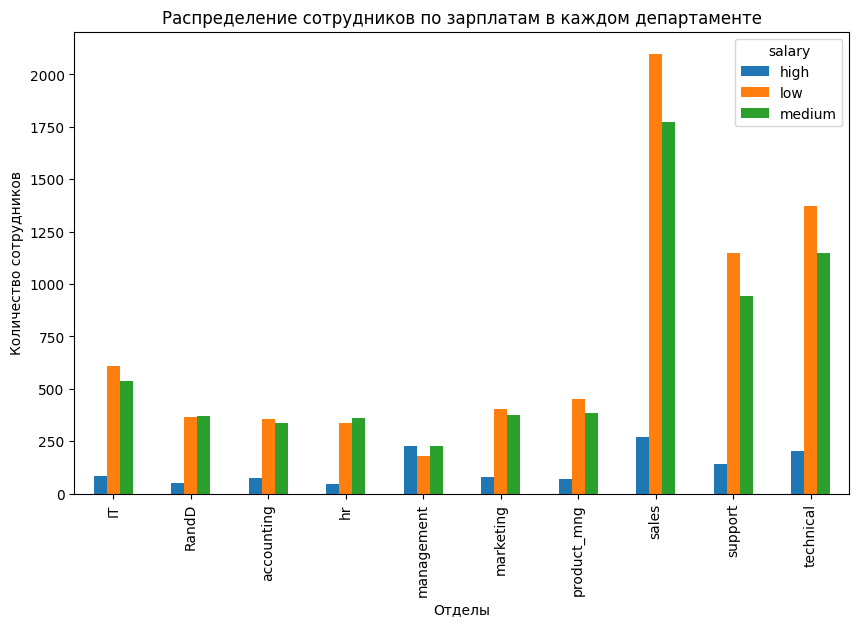

In [23]:
df.groupby(['department', 'salary']).size().unstack().plot(kind='bar', xlabel='Отделы', ylabel='Количество сотрудников', title='Распределение сотрудников по зарплатам в каждом департаменте', figsize=(10, 6))

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [24]:
hours_with_high_salary = df[df['salary'] == 'high']['average_montly_hours'].mean()
hours_with_low_salary = df[df['salary'] == 'low']['average_montly_hours'].mean()
print(f'Среднее количество часов проведенных на работе сотрудников с высокой зарплатой: {hours_with_high_salary:.1f}')
print(f'Среднее количество часов проведенных на работе сотрудников с низкой зарплатой: {hours_with_low_salary:.1f}')

Среднее количество часов проведенных на работе сотрудников с высокой зарплатой: 199.9
Среднее количество часов проведенных на работе сотрудников с низкой зарплатой: 201.0


Гипотеза не подтвердилась.

8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

8.1 Доля сотрудников с повышением за последние 5 лет
8.2 Средняя степень удовлетворенности
8.3 Среднее количество проектов

Вынесем в отдельные переменные уволившихся и работающих на данный момент сотрудников

In [25]:
left = df[df['left'] == 1]
no_left = df[df['left'] == 0]

Доля сотрудников с повышенеим за последние 5 лет

In [26]:
print(f"Доля сотрудников с повышением среди уволившихся: {left['promotion_last_5years'].mean() * 100:.2f}%")
print(f"Доля сотрудников с повышением среди работающих: {no_left['promotion_last_5years'].mean() * 100:.2f}%")

Доля сотрудников с повышением среди уволившихся: 0.53%
Доля сотрудников с повышением среди работающих: 2.63%


Средняя степень удовлетворенности

In [27]:
print(f'Средняя степень удовлетворенности среди уволившихся: {left["satisfaction_level"].mean() * 100:.2f}%')
print(f'Средняя степень удовлетворенности среди работающих: {no_left["satisfaction_level"].mean() * 100:.2f}%')

Средняя степень удовлетворенности среди уволившихся: 44.01%
Средняя степень удовлетворенности среди работающих: 66.68%


Среднее количество проектов

In [28]:
print(f'Среднее количество проектов среди уволившихся: {left["number_project"].mean():.2f}')
print(f'Среднее количество проектов среди неуволившихся: {no_left["number_project"].mean():.2f}')

Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди неуволившихся: 3.79


9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

Возьмем для обучения 80% данных, а для тестирования 20%, установив параметр test_size равным 0.2

In [29]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Построим модель LDA, обучим и протестируем.

In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

Рассчитаем точность предсказаний

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy}')

Точность: 0.749


Предлагаю учесть при обучении модели данные по столбцу salary, чтобы проверить влияет ли уровень зарплаты на увольнение сотрудника. Для этого сделаем категориальный столбец salary числовым.

In [32]:
df['salary'] = df['salary'].apply(lambda x: {'low': 0, 'medium': 1, 'high': 2}[x])

In [33]:
X = df.drop(['left', 'department'], axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy}')

Точность: 0.7713333333333333


Если учесть при прогнозировании данные по уровню заработной платы, то точность предсказания повышается.

10. Загрузить jupyter notebook с решение на github и прислать ссылку